# Hotel Bookings: Unveiling Trends with Python Visualizations

##**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/Mini Project And VIX/Mini Project/Mini Project 2/dataset/CSV/hotel_bookings_data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## Data Preprocessing

### Mengatasi Null Value

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
df = df.drop('company', axis=1)
df['children'] = df['children'].fillna(df['children'].median())
df['city'] = df['city'].fillna(df['city'].mode()[0])
df['agent'] = df['agent'].fillna(df['agent'].mode()[0])
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

### Mengganti Value Tidak Sesuai

In [ ]:
# Menghitung jumlah masing-masing nilai dalam kolom 'nama_kolom'
value_counts = df['meal'].value_counts()

# Mendapatkan nilai-nilai unik dalam kolom 'nama_kolom'
unique_values = df['meal'].unique()

# Menampilkan hasilnya
print("Jumlah nilai unik dalam kolom: ", len(unique_values))
print("Nilai-nilai unik dalam kolom: ", unique_values)

# Menampilkan jumlah masing-masing nilai
print("Jumlah masing-masing nilai dalam kolom:")
print(value_counts)

Jumlah nilai unik dalam kolom:  5
Nilai-nilai unik dalam kolom:  ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']
Jumlah masing-masing nilai dalam kolom:
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64


In [ ]:
df['meal'] = df['meal'].replace('Undefined', 'No Meal')

# Menghitung jumlah masing-masing nilai dalam kolom 'nama_kolom'
value_counts = df['meal'].value_counts()

# Mendapatkan nilai-nilai unik dalam kolom 'nama_kolom'
unique_values = df['meal'].unique()

# Menampilkan hasilnya
print("Jumlah nilai unik dalam kolom: ", len(unique_values))
print("Nilai-nilai unik dalam kolom: ", unique_values)

# Menampilkan jumlah masing-masing nilai
print("Jumlah masing-masing nilai dalam kolom:")
print(value_counts)

Jumlah nilai unik dalam kolom:  4
Nilai-nilai unik dalam kolom:  ['Breakfast' 'Full Board' 'Dinner' 'No Meal']
Jumlah masing-masing nilai dalam kolom:
Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64


### Membuang Data yang Tidak Diperlukan

In [ ]:
df.shape

(119390, 28)

In [ ]:
# membuang data yang berisi kolom tamu 0
df = df.loc[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

# membuang data yang berisi kolom tidak sesuai regulasi (jumlah penginap biasanya maksimal 5 orang)
df = df.loc[
    (df['adults'] >= 1) & (df['adults'] <= 5) &
    (df['children'] >= 0) & (df['children'] <= 5) &
    (df['babies'] >= 0) & (df['babies'] <= 2)
]

In [ ]:
df.shape

(118970, 28)

## Monthly Hotel Booking Analysis Based on Hotel Type

### Membuat Tabel Agregat

In [ ]:
df2 = df.copy()

In [ ]:
# Buat tabel agregat menggunakan groupby dan pivot_table
agg_df = df2.groupby(['hotel', 'arrival_date_year', 'arrival_date_month']).size().reset_index(name='jumlah_pemesanan')
pivot_table = pd.pivot_table(agg_df, values='jumlah_pemesanan', index=['hotel', 'arrival_date_month'], columns='arrival_date_year', fill_value=0)
pivot_table

arrival_date_year                2017  2018  2019
hotel        arrival_date_month                  
City Hotel   April                  0  2352  2580
             August                 0  3913  3960
             December            3379  4198     0
             February            1640  2451     0
             January             1233  3097     0
             July                   0  3665  4540
             June                   0  3550  3898
             March                  0  1353  2358
             May                    0  3031  3386
             November            3524  3857     0
             October             2470  3345  3120
             September           1396  3101  3541
Resort Hotel April                  0  1519  1583
             August                 0  1369  1675
             December            1563  1984     0
             February            1264  1381     0
             January             1104  1331     0
             July                   0  1802  1757
             June                   0  1867  1742
             March                  0   884  1307
             May                    0  1778  1556
             November            1577  1523     0
             October             1409  1685  1800
             September           1377  1441  1754

### Mengurutkan data berdasarkan bulan

In [ ]:
bulan_urutan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table.reindex(bulan_urutan, level=1)
pivot_table

arrival_date_year                2017  2018  2019
hotel        arrival_date_month                  
City Hotel   January             1233  3097     0
             February            1640  2451     0
             March                  0  1353  2358
             April                  0  2352  2580
             May                    0  3031  3386
             June                   0  3550  3898
             July                   0  3665  4540
             August                 0  3913  3960
             September           1396  3101  3541
             October             2470  3345  3120
             November            3524  3857     0
             December            3379  4198     0
Resort Hotel January             1104  1331     0
             February            1264  1381     0
             March                  0   884  1307
             April                  0  1519  1583
             May                    0  1778  1556
             June                   0  1867  1742
             July                   0  1802  1757
             August                 0  1369  1675
             September           1377  1441  1754
             October             1409  1685  1800
             November            1577  1523     0
             December            1563  1984     0

### Membuatlah Plot Perubahan Jumlah Pesanan Hotel setiap Tiap Bulan

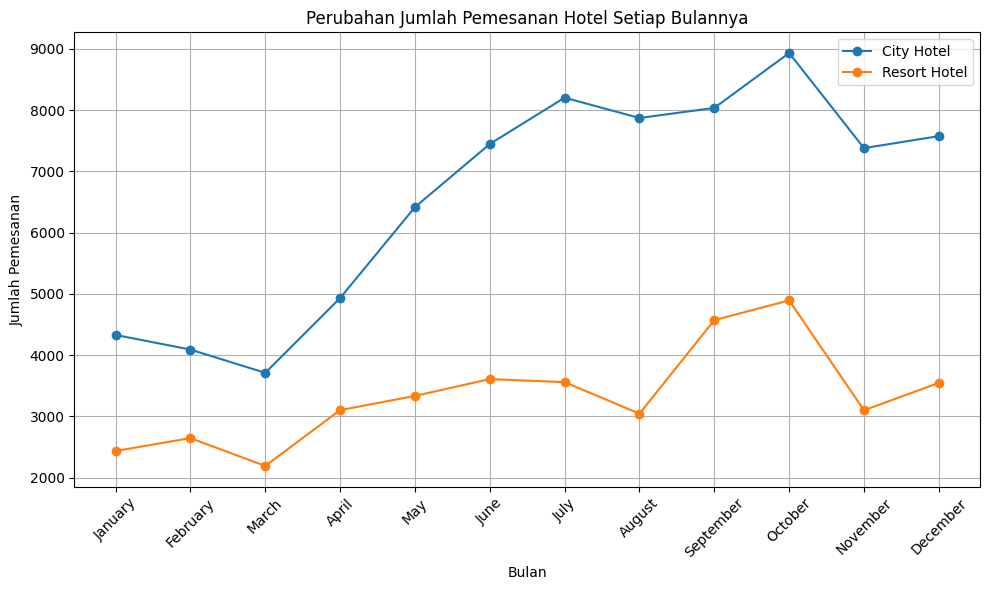

In [ ]:
import matplotlib.pyplot as plt

# Membuat Line Chart
plt.figure(figsize=(10, 6))

# Data untuk 'City Hotel'
city_hotel_data = pivot_table.loc['City Hotel'].sum(axis=1)
plt.plot(city_hotel_data.index, city_hotel_data.values, marker='o', label='City Hotel')

# Data untuk 'Resort Hotel'
resort_hotel_data = pivot_table.loc['Resort Hotel'].sum(axis=1)
plt.plot(resort_hotel_data.index, resort_hotel_data.values, marker='o', label='Resort Hotel')

# Konfigurasi tambahan
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pemesanan')
plt.title('Perubahan Jumlah Pemesanan Hotel Setiap Bulannya')
plt.xticks(rotation=45)
plt.legend()

# Menampilkan grafik
plt.grid(True)
plt.tight_layout()
plt.show()

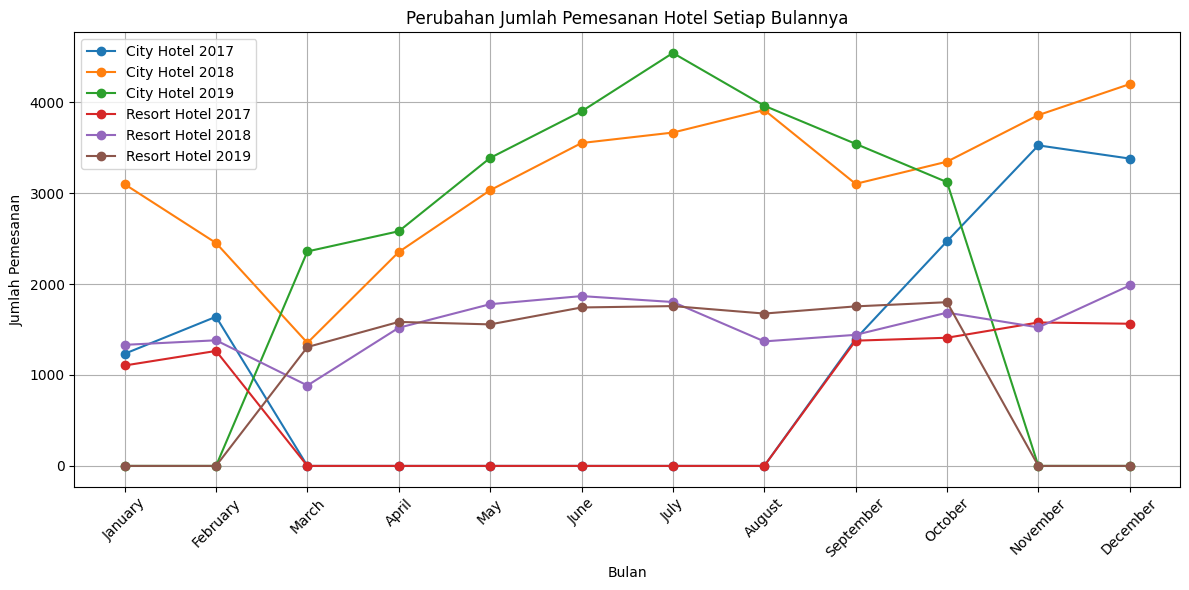

In [ ]:
import matplotlib.pyplot as plt

# Membuat Line Chart
plt.figure(figsize=(12, 6))

# Data untuk 'City Hotel'
city_hotel_data = pivot_table.loc['City Hotel']
for year in city_hotel_data.columns:
    plt.plot(city_hotel_data.index, city_hotel_data[year], marker='o', label=f'City Hotel {year}')

# Data untuk 'Resort Hotel'
resort_hotel_data = pivot_table.loc['Resort Hotel']
for year in resort_hotel_data.columns:
    plt.plot(resort_hotel_data.index, resort_hotel_data[year], marker='o', label=f'Resort Hotel {year}')

# Konfigurasi tambahan
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pemesanan')
plt.title('Perubahan Jumlah Pemesanan Hotel Setiap Bulannya')
plt.xticks(rotation=45)
plt.legend()

# Menampilkan grafik
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretasi

1. Pada bulan juni 2017-2019 merupakah hari dimana cuti bersama idul fitri.
2. Pada bulan juni-juli merupakan hari libur semester sekolah/kuliah
3. Sementara pada bulan desember terdapat jadwal cuti bersama dimulai dari tanggal 23 sampai awal bulan januari
4. Bisnis perhotelan merupakan sektor yang beroperasi dalam siklus tahunan yang diselingi oleh season. Secara umum, bulan November hingga Maret merupakan periode low season dimana pengunjung biasanya tidak begitu ramai. Antara bulan Juni dan akhir september adalah high season, dimana banyak tamu yang berkunjung. ini adalah pola yang terjadi dalam bisnis perhotelan dan pariwisata

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

### Buatlah kolom baru yang berisi total durasi menginap

In [ ]:
df3 = df.copy()
df3['lama_menginap'] = df3["stays_in_weekend_nights"] + df3["stays_in_weekdays_nights"]
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lama_menginap
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,9.0,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,9.0,0,Personal,0.0,0,0,Check-Out,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,9.0,0,Personal,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2


<Axes: xlabel='lama_menginap', ylabel='Count'>

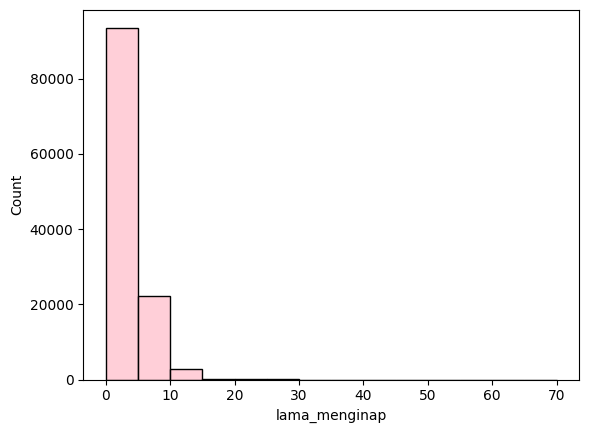

In [ ]:
import seaborn as sns
sns.histplot(data=df3, x='lama_menginap', binwidth=5, color="pink")

Berdasarkan pada histogram dapat disimpulkan persebaran data right-skewed. jadi perlu dilakukan pengelompokkan untuk membuat persebaran data menjadi lebih merata. Pengelompokkan akan dilakuakan untuk pada kolom lama_menginap. Jika terdapat baris yang memiliki lama_menginap lebih dari 2 minggu, maka akan dikelompokan menjadi 2-3 minggu (15-21) dalam satuan hari. Sementara untuk baris yang memiliki total menginap lebih dari 3 minggu akan dikelompokan menjadi (>21).

### Kelompokkan nilai-nilai dari kolom total durasi menginap

In [ ]:
import numpy as np
# pengelompokkan data berdasarkan hasil pengamatan distribusi data
df3['grouping_lama_menginap'] = np.where(df3['lama_menginap'] > 21, 21,
                                np.where(df3['lama_menginap'] > 14, 15,
                                df3['lama_menginap']))
df3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lama_menginap,grouping_lama_menginap
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,9.0,0,Personal,0.00,0,0,Check-Out,0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,9.0,0,Personal,0.00,0,0,Check-Out,0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,9.0,0,Personal,75.00,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.00,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.00,0,1,Check-Out,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,0.0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,0,Personal,96.14,0,0,Check-Out,7,7
119386,City Hotel,0,102,2019,October,35,31,2,5,3,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,225.43,0,2,Check-Out,7,7
119387,City Hotel,0,34,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,157.71,0,4,Check-Out,7,7
119388,City Hotel,0,109,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,0,Personal,104.40,0,0,Check-Out,7,7


### Membuat tabel Agregat Menunjukkan Perbandingan Jumlah Pesanan Hotel Dibatalkan Terhadap Lama Menginap

In [ ]:
# Group by hotel_type dan lama_menginap, kemudian hitung jumlah pesanan yang dibatalkan
agg_df2 = df3.groupby(['hotel', 'lama_menginap', 'grouping_lama_menginap'])['is_canceled'].sum().reset_index()
agg_df2

,hotel,lama_menginap,grouping_lama_menginap,is_canceled
0,City Hotel,0,0,13
1,City Hotel,1,1,4095
2,City Hotel,2,2,10425
3,City Hotel,3,3,9462
4,City Hotel,4,4,4825
...,...,...,...,...
68,Resort Hotel,45,21,0
69,Resort Hotel,46,21,0
70,Resort Hotel,56,21,1
71,Resort Hotel,60,21,0


In [ ]:
# Hitung total pesanan untuk setiap durasi menginap
total_pesanan = df3.groupby(['hotel', 'lama_menginap', 'grouping_lama_menginap'])['is_canceled'].count().reset_index()
total_pesanan.rename(columns={'is_canceled': 'total_pesanan'}, inplace=True)
total_pesanan

,hotel,lama_menginap,grouping_lama_menginap,total_pesanan
0,City Hotel,0,0,264
1,City Hotel,1,1,13227
2,City Hotel,2,2,21384
3,City Hotel,3,3,21314
4,City Hotel,4,4,12492
...,...,...,...,...
68,Resort Hotel,45,21,1
69,Resort Hotel,46,21,1
70,Resort Hotel,56,21,2
71,Resort Hotel,60,21,1


In [ ]:
# Gabungkan kedua DataFrame agar dapat menghitung proporsi
agg_df2 = agg_df2.merge(total_pesanan, on=['hotel', 'lama_menginap', 'grouping_lama_menginap'])
agg_df2.head()

,hotel,lama_menginap,grouping_lama_menginap,is_canceled,total_pesanan
0,City Hotel,0,0,13,264
1,City Hotel,1,1,4095,13227
2,City Hotel,2,2,10425,21384
3,City Hotel,3,3,9462,21314
4,City Hotel,4,4,4825,12492


In [ ]:
# Hitung proporsi pesanan yang dibatalkan
agg_df2['proporsi_dibatalkan'] = ((agg_df2['is_canceled'] / agg_df2['total_pesanan'])*100)

agg_df2.head()

,hotel,lama_menginap,grouping_lama_menginap,is_canceled,total_pesanan,proporsi_dibatalkan
0,City Hotel,0,0,13,264,4.924242
1,City Hotel,1,1,4095,13227,30.959401
2,City Hotel,2,2,10425,21384,48.751403
3,City Hotel,3,3,9462,21314,44.393356
4,City Hotel,4,4,4825,12492,38.624720


### Plot yang Menunjukkan Pengaruh Rasio Pembatalan Terhadap Durasi Menginap


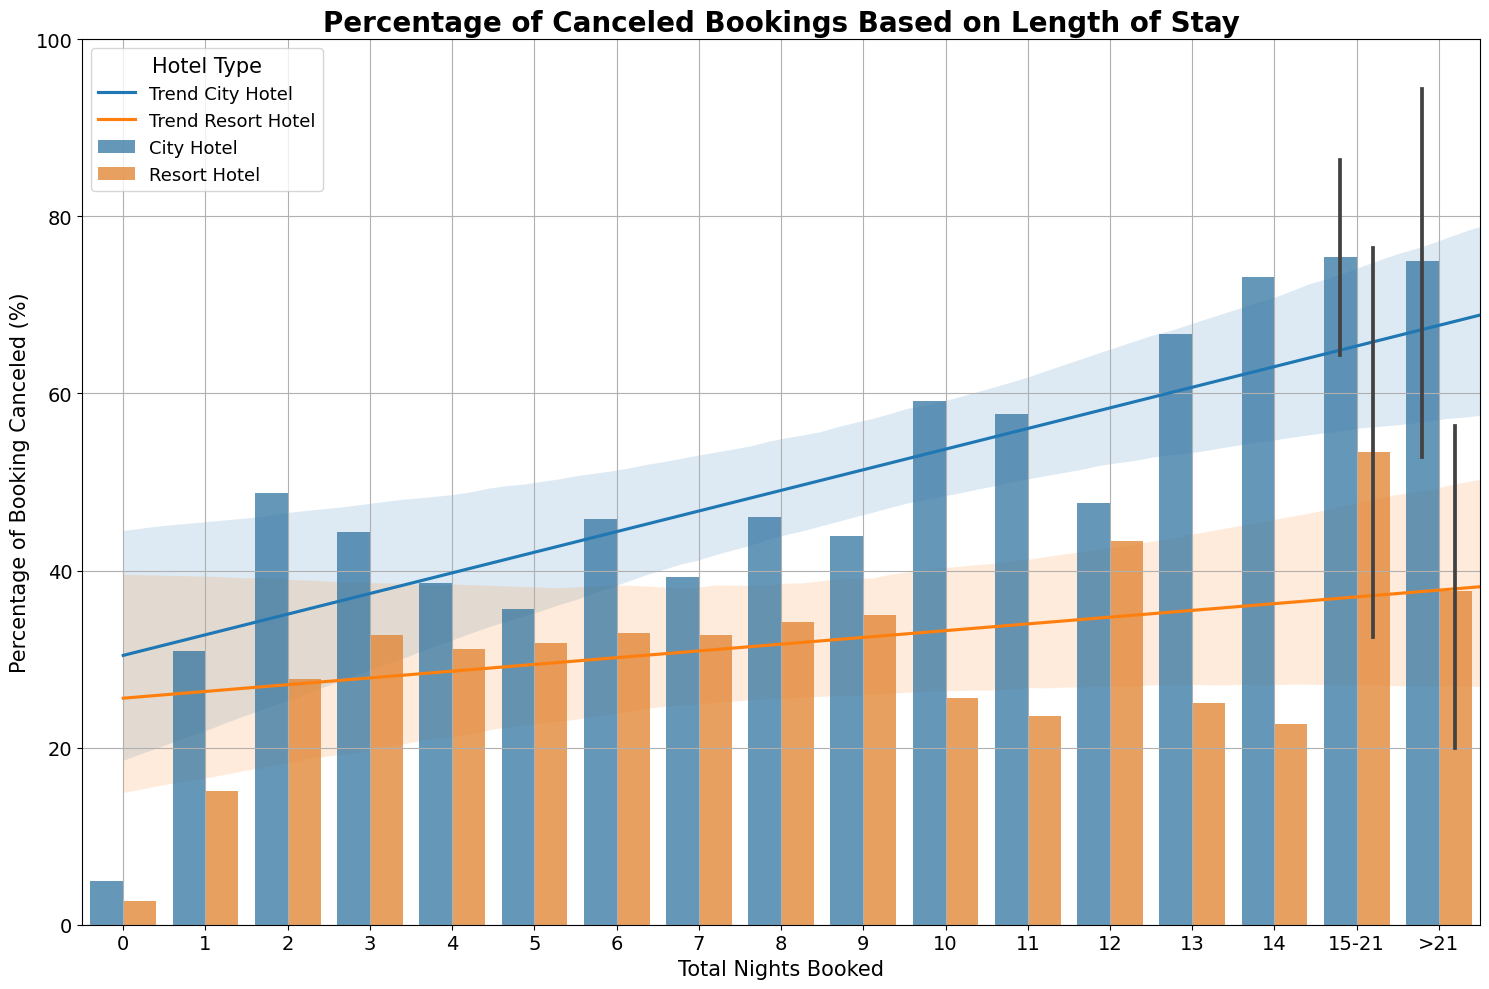

In [ ]:
plt.figure(figsize=(15, 10))
sns.regplot(x='grouping_lama_menginap', y='proporsi_dibatalkan', data=agg_df2[agg_df2['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='grouping_lama_menginap', y='proporsi_dibatalkan', data=agg_df2[agg_df2['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
sns.barplot(x='grouping_lama_menginap', y='proporsi_dibatalkan', hue='hotel', data=agg_df2, alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size': 13})

plt.xticks(range(0, 17, 1), labels=[str(x) for x in range(0, 15, 1)]+["15-21", ">21"])
plt.xlabel('Total Nights Booked', fontsize=15)
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15)
plt.ylim(0, 100)

plt.title("Percentage of Canceled Bookings Based on Length of Stay", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

### Interpretasi
Semakil lama durasi menginap maka semakin besar juga resiko pembatalan pesanan, ini berlaku untuk kedua jenis hotel.
Dapat diketahui juga City Hotel memiliki resiko pembatalan lebih besar ketimbang Resort Hotel, hal ini berlaku untuk masing-masing grouping lama menginap



## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate


### Membuat kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan

In [ ]:
df4 = df.copy()
df4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,9.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,9.0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,9.0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out


<Axes: xlabel='lead_time', ylabel='Count'>

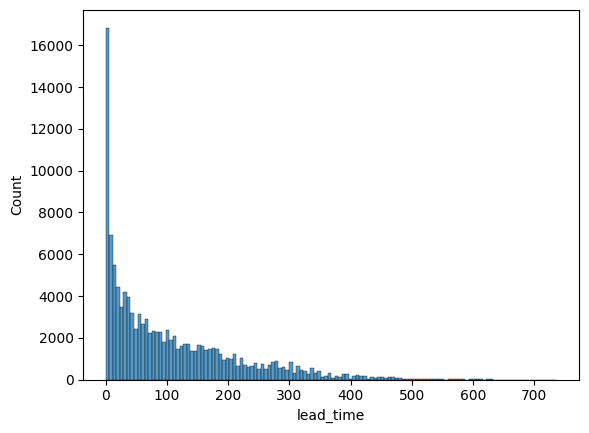

In [ ]:
sns.histplot(df4['lead_time'])

Berdasarkan pada histogram, diketahui bahwa persebaran data right-skewed. Jadi sebaiknya dilakukan pengelompokkan data agar persebaran data menjadi lebih merata. Lead Time yang semulanya dalam satuan hari akan dikelompokkan menjadi satuan bulanan (30 hari) per group.

In [ ]:
# Mengkategorisasi kolom lead_time agar lebih sederhana
df4['lead_times'] = np.where(df4['lead_time'] > 400, 401,
                             df4['lead_time']) # lead_time dengan value yg cukup besar (lebih dari 400) dikategorisasikan menjadi satu grup

bins = list(np.arange(0,max(df4['lead_times'])+30, 30))

labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]

df4['lead_time_group'] = pd.cut(df4['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

### Membuat tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel

In [ ]:
# Mengelompokkan data berdasarkan jenis hotel dan lead_time, dan menghitung jumlah pemesanan yang dibatalkan
agg_df3 = df4.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df4_pivot = agg_df3.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df4_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df4_pivot['all_bookings'] = df4_pivot['not_canceled']+df4_pivot['canceled']
df4_pivot['pct_canceled'] = df4_pivot['canceled']*100.0/(df4_pivot['all_bookings'])

df4_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18027,5171,23198,22.290715
1,City Hotel,30-60,7244,4598,11842,38.827901
2,City Hotel,60-90,5193,3686,8879,41.513684
3,City Hotel,90-120,3940,3483,7423,46.921730
4,City Hotel,120-150,3051,2534,5585,45.371531


### Membuat plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel

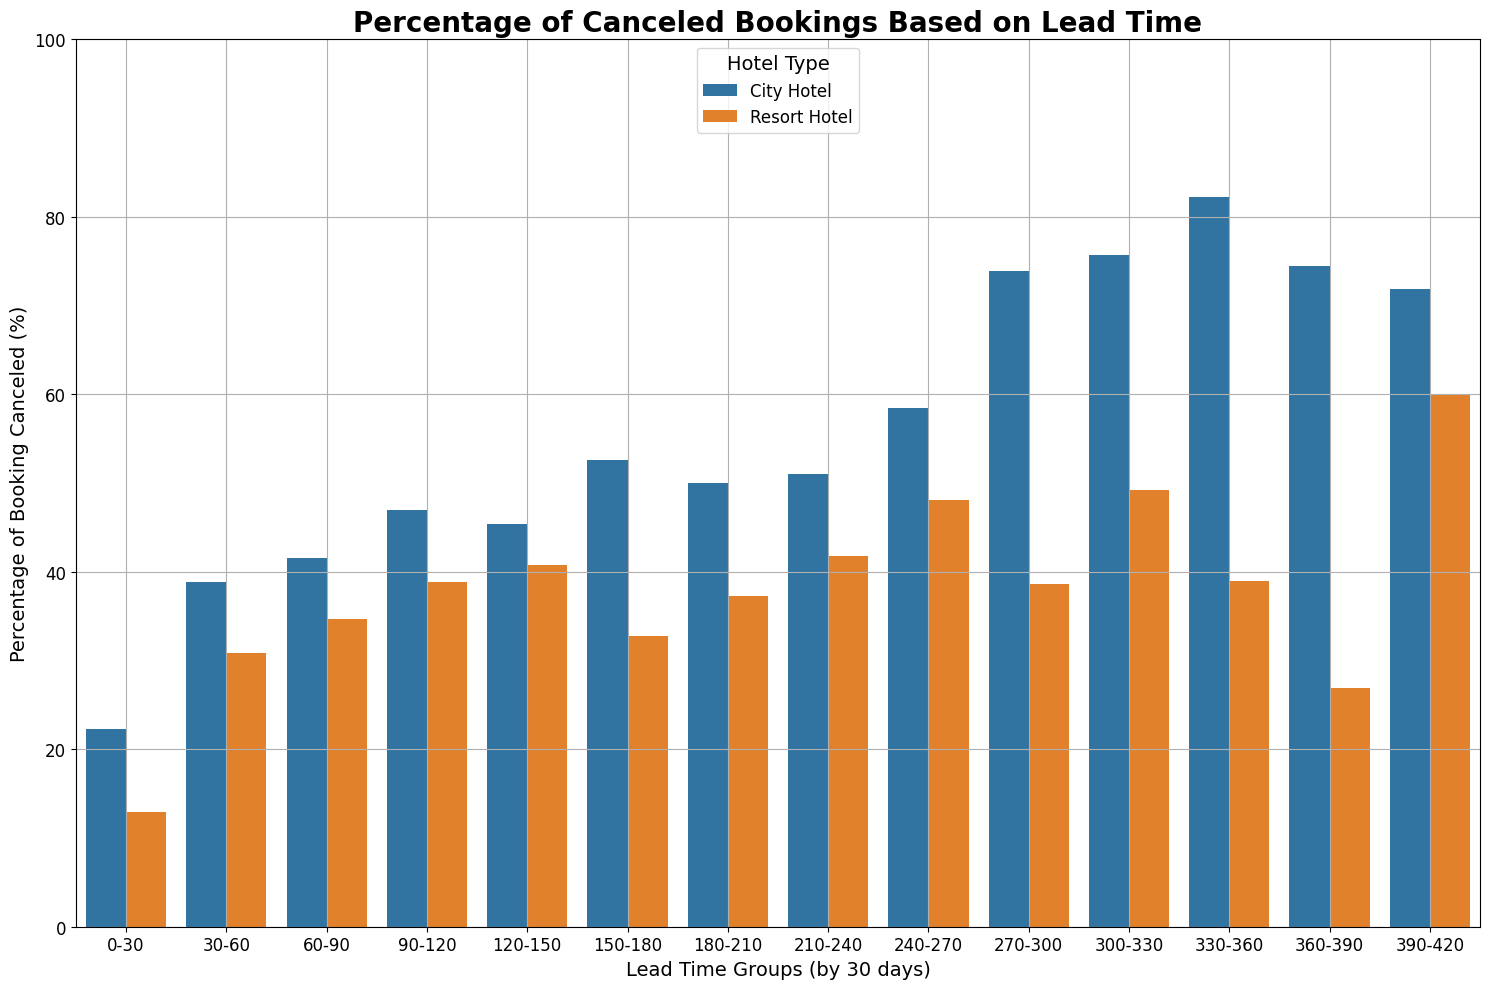

In [ ]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=df4_pivot) # plot awal menggunakan barplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=12) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14) # mengatur title pada x-axis
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=14) # mengatur title pada y-axis
plt.ylim(0, 100) # membatasi y-axis
plt.xlim(-0.5,13.5) # membatasi x-axis

plt.title("Percentage of Canceled Bookings Based on Lead Time", fontsize=20, fontweight='bold')


plt.tight_layout()
plt.show()


### Interpretasi

Pada kedua jenis hotel, tingkat pembatalan pesanan hotel paling rendah adalah pada pesanan yang memiliki Lead Time 1-30 hari. Sedangkan untuk pesanan yang memiliki Lead Time antara 300-420 memiliki tingkat pembatalan tertinggi. Dapat diketahui juga City Hotel memiliki resiko pembatalan lebih besar ketimbang Resort Hotel, hal ini berlaku untuk masing-masing grouping Lead Time

